In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import average_precision_score, roc_auc_score, classification_report

In [ ]:
data = pd.read_csv('data_with_FE.csv')

In [ ]:
data.columns

Index(['gender', 'owns_car', 'owns_property', 'n_children', 'annual_income',
       'income_type', 'education_type', 'marital_status', 'housing_type',
       'has_work_phone', 'has_phone', 'has_email', 'occupation',
       'n_fam_members', 'years_employed', 'age', 'label',
       'employment_age_ratio', 'single_parent', 'communication_score'],
      dtype='object')

# Visualizing data using t-SNE

In [ ]:
# Subset original dataset
original_data = data.copy()
original_data = original_data.drop(columns=['employment_age_ratio', 'single_parent', 'communication_score'])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


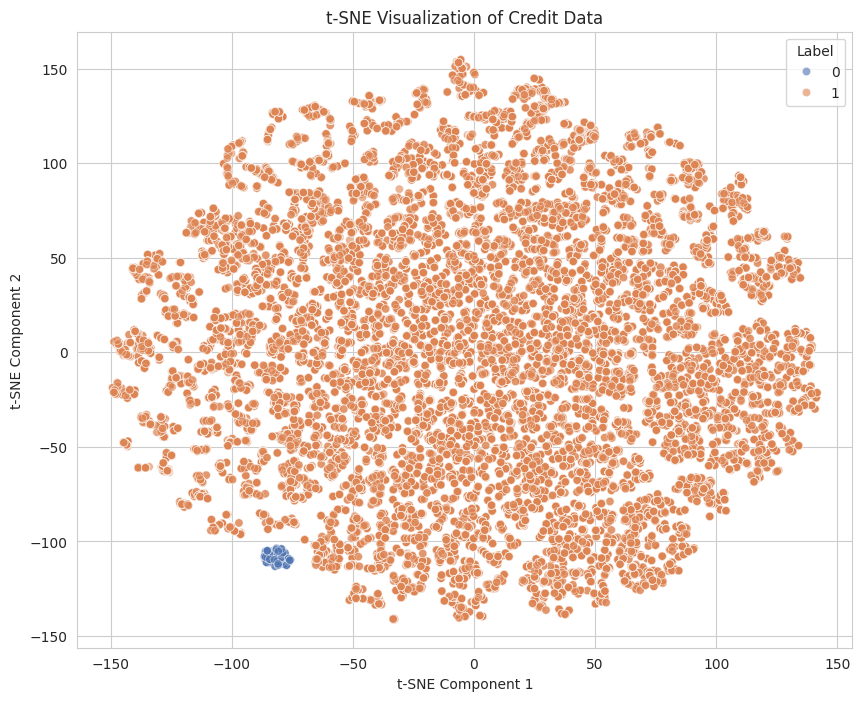

In [ ]:
def prepare_data(data):
    # Create a copy to avoid modifying the original data
    data = data.copy()

    # Initialize label encoder
    le = LabelEncoder()

    # Convert categorical variables to numeric
    categorical_cols = ['gender', 'owns_car', 'owns_property', 'income_type',
                       'education_type', 'marital_status', 'housing_type', 'occupation']

    for col in categorical_cols:
        if col in data.columns:
            data[col] = le.fit_transform(data[col].astype(str))

    # Standardize all features
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    return data_scaled, data['label']

def perform_tsne(data_scaled, labels, perplexity=30, n_iter=1000):
    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, random_state=42)
    tsne_results = tsne.fit_transform(data_scaled)

    # Create DataFrame with t-SNE results
    df_tsne = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
    df_tsne['Label'] = labels

    return df_tsne

def plot_tsne(df_tsne):
    # Set up the plot style
    plt.figure(figsize=(10, 8))
    sns.set_style("whitegrid")

    # Create scatter plot
    sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Label',
                    palette='deep', alpha=0.6)

    plt.title('t-SNE Visualization of Credit Data')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')

    return plt

# Execute the analysis
data_scaled, labels = prepare_data(original_data)
df_tsne = perform_tsne(data_scaled, labels)
plt = plot_tsne(df_tsne)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


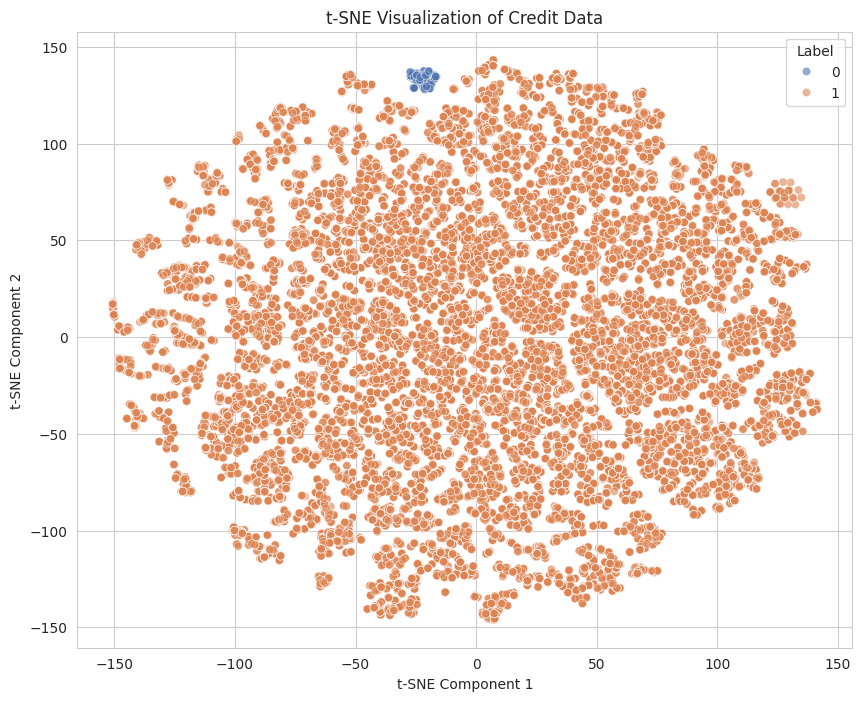

In [ ]:
# Execute the analysis
data_scaled, labels = prepare_data(data)
df_tsne = perform_tsne(data_scaled, labels)
plt = plot_tsne(df_tsne)
plt.show()

# Testing on original dataset (without engineered features)

In [ ]:
# Separate features and target
X = original_data.drop('label', axis=1)
y = original_data['label']

In [ ]:
numerical_features = [ 'n_children', 'annual_income','n_fam_members', 'years_employed', 'age']
categorical_features = ['gender', 'owns_car', 'owns_property',
       'income_type', 'education_type', 'marital_status', 'housing_type',
       'has_work_phone', 'has_phone', 'has_email', 'occupation']

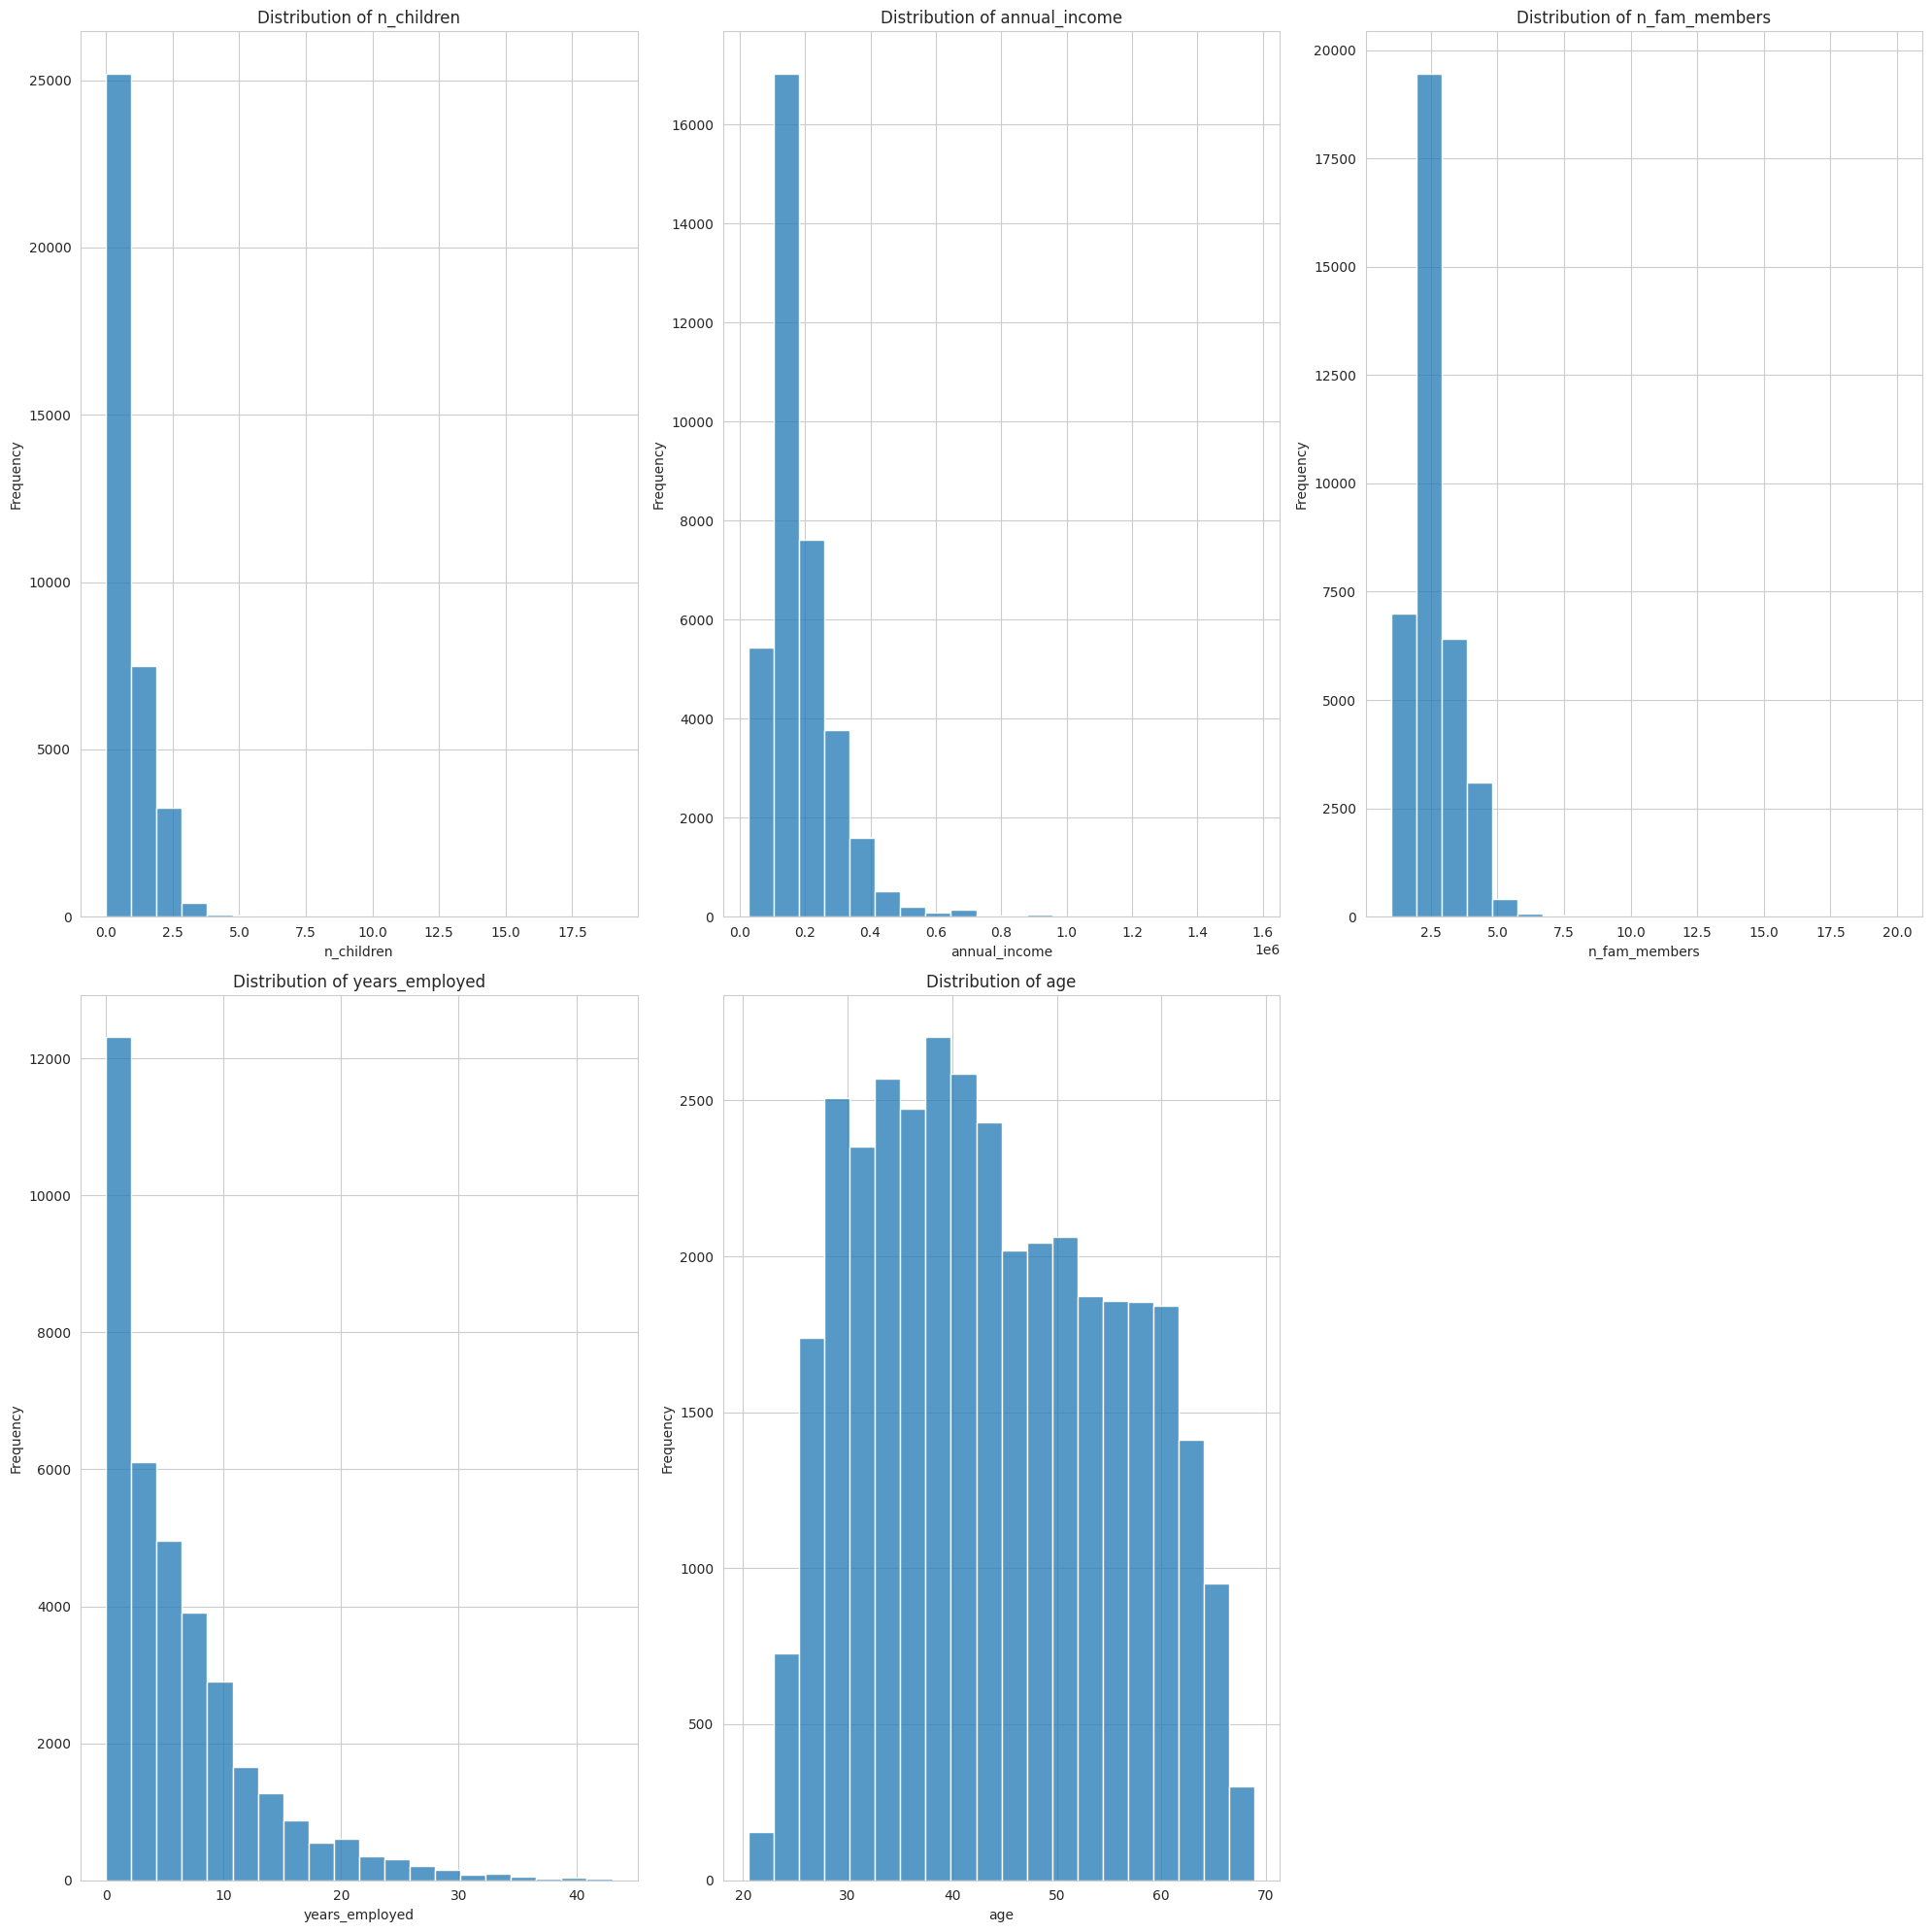

In [ ]:
# draw histogram for all numerical features
plt.figure(figsize=(20, 20))
for i, col in enumerate(X[numerical_features].columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(X[col], bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Split the data into training and testing sets (First)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create preprocessing transformers
numeric_transformer = RobustScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)
# Transform the test data using the same preprocessor
X_test = preprocessor.transform(X_test)

Logistic Regression - Original Data Metrics:
--------------------------------------------------
Precision: 0.9960
Recall: 1.0000
F1 Score: 0.9980
PRC AUC Score: 0.9968
ROC AUC Score: 0.6025
Matthews Correlation Coefficient: 0.0000

Confusion Matrix:
--------------------------------------------------


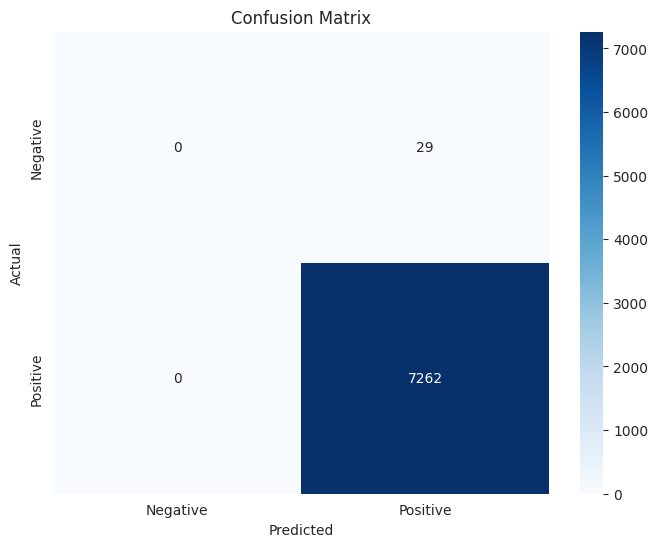


Detailed Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       1.00      1.00      1.00      7262

    accuracy                           1.00      7291
   macro avg       0.50      0.50      0.50      7291
weighted avg       0.99      1.00      0.99      7291



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Train logistic regression on original data
lr_original = LogisticRegression(random_state=42)
lr_original.fit(X_train, y_train)

# Make predictions
y_pred_original = lr_original.predict(X_test)
y_prob_original = lr_original.predict_proba(X_test)[:, 1]

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred_original)
precision = precision_score(y_test, y_pred_original)
recall = recall_score(y_test, y_pred_original)
f1 = f1_score(y_test, y_pred_original)
prc_auc = average_precision_score(y_test, y_prob_original)
roc_auc = roc_auc_score(y_test, y_prob_original)
mcc = matthews_corrcoef(y_test, y_pred_original)

# Print metrics
print("Logistic Regression - Original Data Metrics:")
print("-" * 50)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"PRC AUC Score: {prc_auc:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print("\nConfusion Matrix:")
print("-" * 50)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("\nDetailed Classification Report:")
print("-" * 50)
print(classification_report(y_test, y_pred_original))

# Testing on original dataset after SMOTE (without engineered features)

In [ ]:
# Separate features and target
X = original_data.drop('label', axis=1)
y = original_data['label']

In [ ]:
numerical_features = [ 'n_children', 'annual_income','n_fam_members', 'years_employed', 'age']
categorical_features = ['gender', 'owns_car', 'owns_property',
       'income_type', 'education_type', 'marital_status', 'housing_type',
       'has_work_phone', 'has_phone', 'has_email', 'occupation']

In [ ]:
# Split the data into training and testing sets (First)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create preprocessing transformers
numeric_transformer = RobustScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)
# Transform the test data using the same preprocessor
X_test = preprocessor.transform(X_test)

In [ ]:
overSampler = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = overSampler.fit_resample(X_train, y_train)

sampler = SMOTE(random_state=42)
X_train, y_train = sampler.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Original SMOTE Data Metrics:
--------------------------------------------------
Precision: 0.9974
Recall: 0.6758
F1 Score: 0.8057
PRC AUC Score: 0.9959
ROC AUC Score: 0.5959
Matthews Correlation Coefficient: 0.0306

Confusion Matrix:
--------------------------------------------------


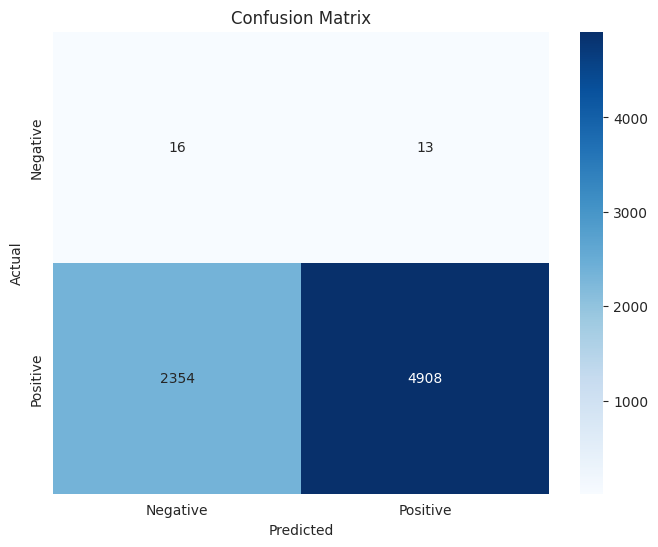


Detailed Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.01      0.55      0.01        29
           1       1.00      0.68      0.81      7262

    accuracy                           0.68      7291
   macro avg       0.50      0.61      0.41      7291
weighted avg       0.99      0.68      0.80      7291



In [ ]:
# Train logistic regression on SMOTE data
lr_original_smote = LogisticRegression(random_state=42)
lr_original_smote.fit(X_train, y_train)

# Make predictions
y_pred_original = lr_original_smote.predict(X_test)
y_prob_original = lr_original_smote.predict_proba(X_test)[:, 1]

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred_original)
precision = precision_score(y_test, y_pred_original)
recall = recall_score(y_test, y_pred_original)
f1 = f1_score(y_test, y_pred_original)
prc_auc = average_precision_score(y_test, y_prob_original)
roc_auc = roc_auc_score(y_test, y_prob_original)
mcc = matthews_corrcoef(y_test, y_pred_original)

# Print metrics
print("Logistic Regression - Original SMOTE Data Metrics:")
print("-" * 50)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"PRC AUC Score: {prc_auc:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print("\nConfusion Matrix:")
print("-" * 50)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("\nDetailed Classification Report:")
print("-" * 50)
print(classification_report(y_test, y_pred_original))

In [ ]:
print('Testing Logistic Regression with oversampling')

lr_original_oversampling = LogisticRegression(random_state=42)
lr_original_oversampling.fit(X_train_oversampled, y_train_oversampled)

y_pred_original_oversampling = lr_original_oversampling.predict(X_test)
y_prob_original_oversampling = lr_original_oversampling.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred_original_oversampling)
precision = precision_score(y_test, y_pred_original_oversampling)
recall = recall_score(y_test, y_pred_original_oversampling)
f1 = f1_score(y_test, y_pred_original_oversampling)
prc_auc = average_precision_score(y_test, y_prob_original_oversampling)
roc_auc = roc_auc_score(y_test, y_prob_original_oversampling)
mcc = matthews_corrcoef(y_test, y_pred_original_oversampling)

print("Logistic Regression - Original Oversampling Data Metrics:")
print("-" * 50)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"PRC AUC Score: {prc_auc:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print("\nConfusion Matrix:")
print("-" * 50)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nDetailed Classification Report:")
print("-" * 50)
print(classification_report(y_test, y_pred_original_oversampling))


# Testing on dataset after SMOTE (with engineered features)

In [ ]:
# Separate features and target
X = data.drop('label', axis=1)
y = data['label']

In [ ]:
numerical_features = [ 'n_children', 'annual_income','n_fam_members', 'years_employed', 'age',
                      'employment_age_ratio', 'communication_score']
categorical_features = ['gender', 'owns_car', 'owns_property',
       'income_type', 'education_type', 'marital_status', 'housing_type',
       'has_work_phone', 'has_phone', 'has_email', 'occupation', 'single_parent']

In [ ]:
# Split the data into training and testing sets (First)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create preprocessing transformers
numeric_transformer = RobustScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)
# Transform the test data using the same preprocessor
X_test = preprocessor.transform(X_test)

In [ ]:
overSampler = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = overSampler.fit_resampled(X_train, y_train)

sampler = SMOTE(random_state=42)
X_train, y_train = sampler.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - SMOTE Data Metrics:
--------------------------------------------------
Precision: 0.9973
Recall: 0.6662
F1 Score: 0.7988
PRC AUC Score: 0.9957
ROC AUC Score: 0.5997
Matthews Correlation Coefficient: 0.0291

Confusion Matrix:
--------------------------------------------------


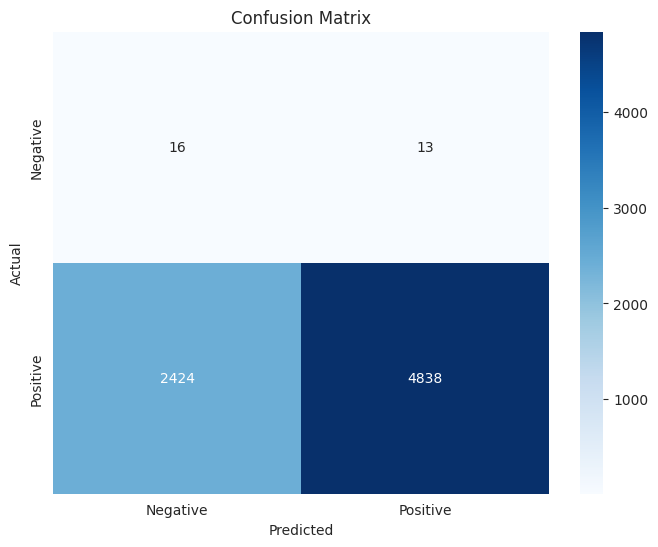


Detailed Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.01      0.55      0.01        29
           1       1.00      0.67      0.80      7262

    accuracy                           0.67      7291
   macro avg       0.50      0.61      0.41      7291
weighted avg       0.99      0.67      0.80      7291



In [ ]:
# Train logistic regression on SMOTE data
lr_smote = LogisticRegression(random_state=42)
lr_smote.fit(X_train, y_train)

# Make predictions
y_pred_original = lr_smote.predict(X_test)
y_prob_original = lr_smote.predict_proba(X_test)[:, 1]

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred_original)
precision = precision_score(y_test, y_pred_original)
recall = recall_score(y_test, y_pred_original)
f1 = f1_score(y_test, y_pred_original)
prc_auc = average_precision_score(y_test, y_prob_original)
roc_auc = roc_auc_score(y_test, y_prob_original)
mcc = matthews_corrcoef(y_test, y_pred_original)

# Print metrics
print("Logistic Regression - SMOTE Data Metrics:")
print("-" * 50)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"PRC AUC Score: {prc_auc:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print("\nConfusion Matrix:")
print("-" * 50)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("\nDetailed Classification Report:")
print("-" * 50)
print(classification_report(y_test, y_pred_original))

In [ ]:
print('Test Logistic Regression with oversampling')

lr_oversampling = LogisticRegression(random_state=42)
lr_oversampling.fit(X_train_oversampled, y_train_oversampled)

y_pred_oversampling = lr_oversampling.predict(X_test)
y_prob_oversampling = lr_oversampling.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred_oversampling)
precision = precision_score(y_test, y_pred_oversampling)
recall = recall_score(y_test, y_pred_oversampling)
f1 = f1_score(y_test, y_pred_oversampling)
prc_auc = average_precision_score(y_test, y_prob_oversampling)
roc_auc = roc_auc_score(y_test, y_prob_oversampling)
mcc = matthews_corrcoef(y_test, y_pred_oversampling)

print("Logistic Regression - Original Oversampling Data Metrics:")
print("-" * 50)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"PRC AUC Score: {prc_auc:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print("\nConfusion Matrix:")
print("-" * 50)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nDetailed Classification Report:")
print("-" * 50)
print(classification_report(y_test, y_pred_oversampling))


# Testing on dataset excluding features used for engineering after SMOTE (with engineered features)

In [ ]:
# Separate features and target
X = data.drop('label', axis=1)
y = data['label']

In [ ]:
numerical_features = [ 'annual_income','n_fam_members',
                      'employment_age_ratio', 'communication_score']
categorical_features = ['gender', 'owns_car', 'owns_property',
       'income_type', 'education_type', 'housing_type', 'occupation', 'single_parent']

In [ ]:
# Split the data into training and testing sets (First)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create preprocessing transformers
numeric_transformer = RobustScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)
# Transform the test data using the same preprocessor
X_test = preprocessor.transform(X_test)

In [ ]:
overSampler = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = overSampler.fit_resampled(X_train, y_train)

sampler = SMOTE(random_state=42)
X_train, y_train = sampler.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - SMOTE Data Metrics:
--------------------------------------------------
Precision: 0.9974
Recall: 0.6803
F1 Score: 0.8088
PRC AUC Score: 0.9954
ROC AUC Score: 0.6079
Matthews Correlation Coefficient: 0.0313

Confusion Matrix:
--------------------------------------------------


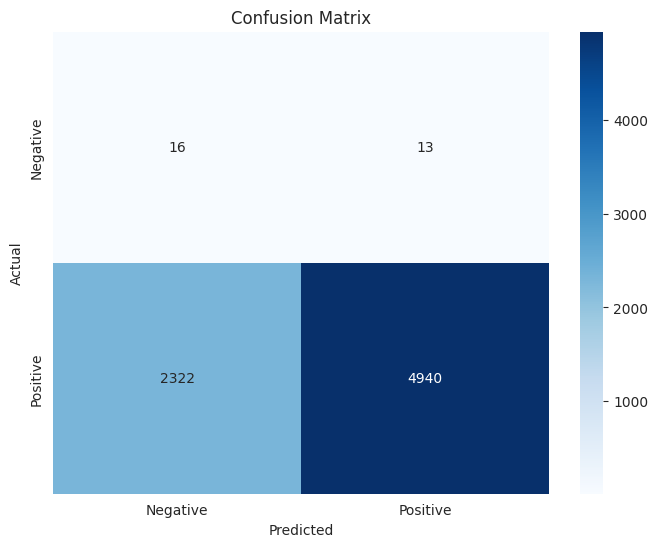


Detailed Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.01      0.55      0.01        29
           1       1.00      0.68      0.81      7262

    accuracy                           0.68      7291
   macro avg       0.50      0.62      0.41      7291
weighted avg       0.99      0.68      0.81      7291



In [ ]:
# Train logistic regression on SMOTE data
lr_smote = LogisticRegression(random_state=42)
lr_smote.fit(X_train, y_train)

# Make predictions
y_pred_original = lr_smote.predict(X_test)
y_prob_original = lr_smote.predict_proba(X_test)[:, 1]

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred_original)
precision = precision_score(y_test, y_pred_original)
recall = recall_score(y_test, y_pred_original)
f1 = f1_score(y_test, y_pred_original)
prc_auc = average_precision_score(y_test, y_prob_original)
roc_auc = roc_auc_score(y_test, y_prob_original)
mcc = matthews_corrcoef(y_test, y_pred_original)

# Print metrics
print("Logistic Regression - SMOTE Data Metrics:")
print("-" * 50)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"PRC AUC Score: {prc_auc:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print("\nConfusion Matrix:")
print("-" * 50)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("\nDetailed Classification Report:")
print("-" * 50)
print(classification_report(y_test, y_pred_original))

In [ ]:
print('Testing Logistic Regression with oversampling')

lr_oversampling = LogisticRegression(random_state=42)
lr_oversampling.fit(X_train_oversampled, y_train_oversampled)

y_pred_oversampling = lr_oversampling.predict(X_test)
y_prob_oversampling = lr_oversampling.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred_oversampling)
precision = precision_score(y_test, y_pred_oversampling)
recall = recall_score(y_test, y_pred_oversampling)
f1 = f1_score(y_test, y_pred_oversampling)
prc_auc = average_precision_score(y_test, y_prob_oversampling)
roc_auc = roc_auc_score(y_test, y_prob_oversampling)
mcc = matthews_corrcoef(y_test, y_pred_oversampling)

print("Logistic Regression - Original SMOTE Data Metrics:")
print("-" * 50)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"PRC AUC Score: {prc_auc:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print("\nConfusion Matrix:")
print("-" * 50)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nDetailed Classification Report:")
print("-" * 50)
print(classification_report(y_test, y_pred_oversampling))
